Import Library

# **Prediksi Tingkat Stress Siswa Berdasarkan Gaya Hidupnya**
---

### **Kelompok 05 - Pembelajaran Mesin B**

1. Dzu Sunan Muhammad - 24060122120034
2. Dhela Realine - 24060122130078
3. Tera Makna Pratiwi - 24060122140102
5. Adzkiya Qarina Salsabila - 24060122140138

### **Introduction**

Pada unsupervised learning ini akan dilakukan clustering dengan menggunakan algoritma K-Means Clustering. Dataset yang digunakan student lifestyle dataset,clustering dilakukan dari data siswa berdasarkan durasi belajar, durasi ekstarkurikuler, durasi tidur, durasi bersosial, durasi kegiatan fisik, dan nilai.

Detail dataset:
*   Student_ID: Kode unik untuk data mahasiswa
*   Study_Hours_Per_Day: Durasi belajar siswa per hari
*   Extracurricular_Hours_Per_Day: Durasi esktrakurikuler siswa per hari
*   Sleep_Hours_Per_Day:  Durasi tidur siswa per hari
*   Social_Hours_Per_Day: Durasi bersosial siswa per hari
*   Physical_Activity_Hours_Per_Day: Durasi aktifitas fisik siswa
*   Stress_Level: Tingkat stress siswa (Low, Moderate, High)

Tujuan dari clustering siswa berdasarkan gaya hidupnya adalah untuk mengidentifikasi pola atau kelompok siswa yang memiliki karakteristik gaya hidup serupa. Dengan pendekatan ini, diharapkan dapat ditemukan hubungan antara faktor-faktor, dengan tingkat stres yang dialami siswa. Clustering ini memungkinkan penanganan yang lebih tepat dan sesuai dengan kebutuhan masing-masing kelompok, seperti program pengelolaan stres yang disesuaikan dengan gaya hidup spesifik mereka, serta memberikan wawasan yang lebih dalam mengenai faktor-faktor yang mempengaruhi mental siswa.

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from random import sample
from numpy.random import uniform
from scipy.spatial.distance import cdist
from math import isnan
from scipy.stats import boxcox
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

### **1. Load and Explore the Data**

Load Dataset

In [ ]:
data = pd.read_csv('student_lifestyle_dataset.csv')
data.shape

(2000, 8)

Overall Structure

In [ ]:
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


Data Types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


Check for Missing Values

In [ ]:
data.isnull().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [ ]:
data.duplicated().sum()

0

### **2. Descriptive Statistics and Visualizations**

Statistics Summary

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,2000.0,1000.50000,577.494589,1.00,500.75,1000.50,1500.25,2000.0
Study_Hours_Per_Day,2000.0,7.47580,1.423888,5.00,6.30,7.40,8.70,10.0
Extracurricular_Hours_Per_Day,2000.0,1.99010,1.155855,0.00,1.00,2.00,3.00,4.0
Sleep_Hours_Per_Day,2000.0,7.50125,1.460949,5.00,6.20,7.50,8.80,10.0
Social_Hours_Per_Day,2000.0,2.70455,1.688514,0.00,1.20,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,2000.0,4.32830,2.514110,0.00,2.40,4.10,6.10,13.0
GPA,2000.0,3.11596,0.298674,2.24,2.90,3.11,3.33,4.0


Histplot

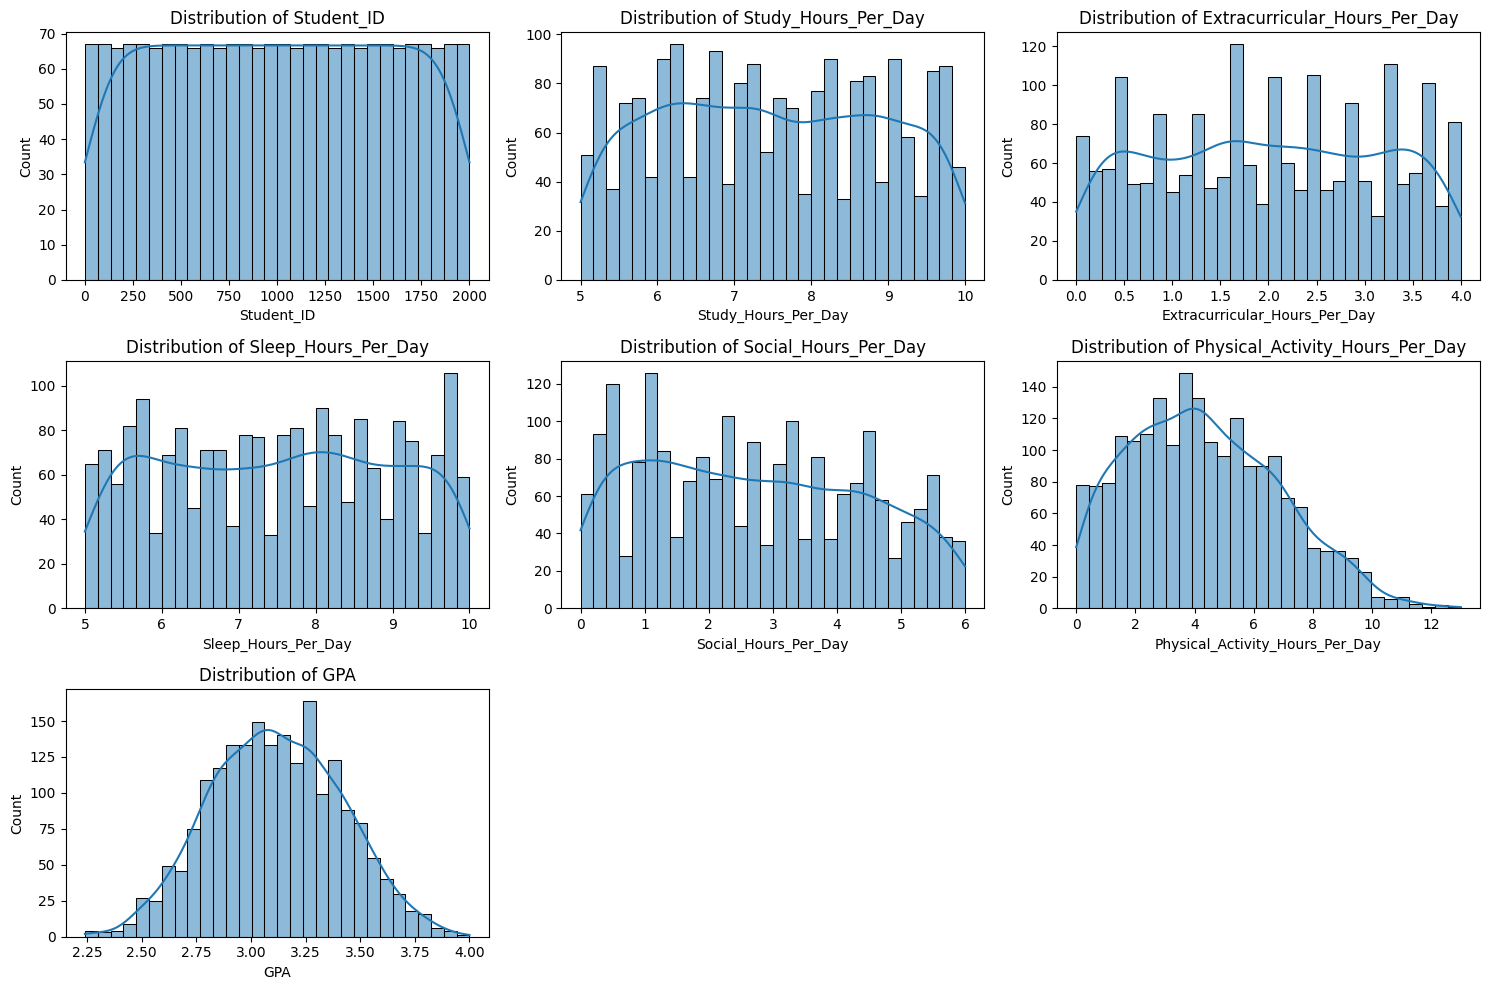

In [ ]:
# Filter hanya kolom numerik
numeric_columns = data.select_dtypes(include=np.number).columns

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

# Plot setiap kolom
for i, column in enumerate(numeric_columns):
    sns.histplot(data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Boxplot

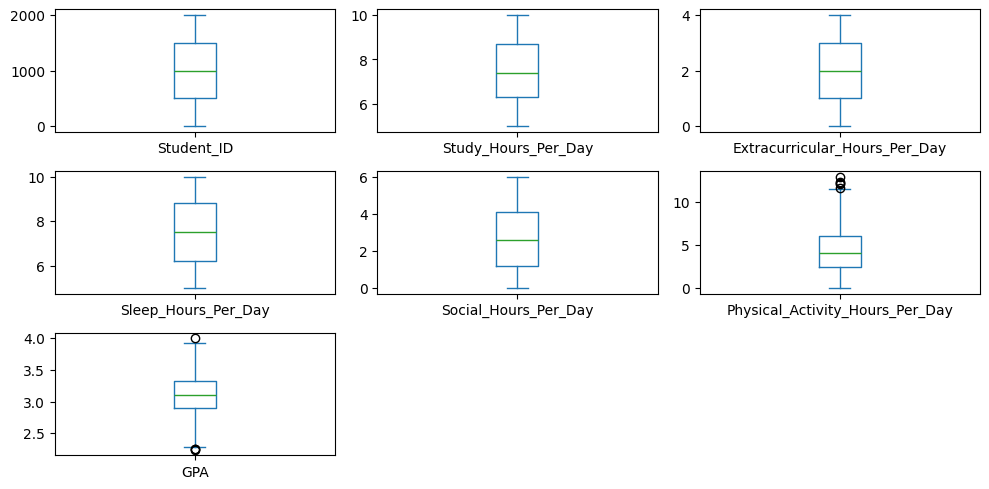

In [ ]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(10, 5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

# Define a threshold for identifying outliers
threshold = 3

# Find outliers
outliers = np.where(z_scores > threshold)
outlier_rows = data.iloc[outliers[0]]
outlier_rows

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
62,63,5.1,0.5,5.2,0.2,13.0,2.85,High
171,172,5.1,0.3,6.0,0.2,12.4,2.70,Low
784,785,5.1,0.3,6.3,0.2,12.1,2.55,Low
1174,1175,5.3,0.3,5.9,0.2,12.3,2.97,High


### **3. Correlation and Redundancy Check**

Correlation Matrix

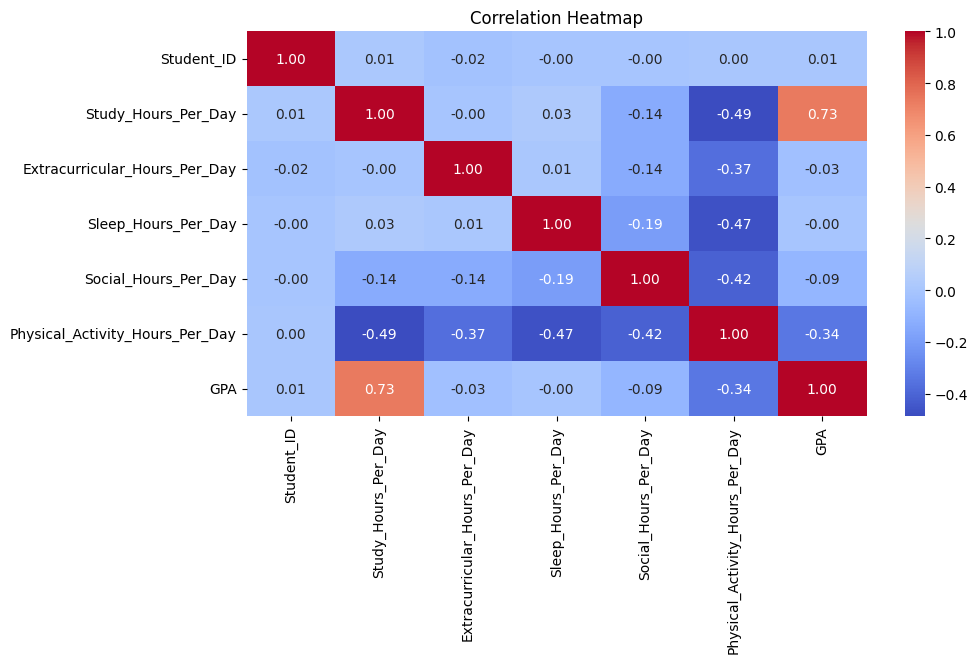

In [ ]:
data_numeric = data.select_dtypes(include=['number'])
corr_matrix = data_numeric.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### **4. Hasil Eksplorasi Data**

1. Dataset terdiri dari 2000 data dan 8 fitur.
2. Terdapat satu fitur dengan data kategorikal yang merupakan label, yaitu Stress_Level.
3. Tidak terdapat missing values ataupun duplicate values.
4. Distribusi data dari Student_ID adalah uniform karena merupakan identifier.
5. Distribusi data dari Study_Hours_Per_Day adalah normal dengan rentang 5 - 10.
6. Distribusi data dari Extracurricular_Hours_Per_Day adalah normal dengan rentang 0 - 4.
7. Distribusi data dari Sleep_Hours_Per_Day adalah normal dengan rentang 5 - 10.
8. Distribusi data dari Social_Hours_Per_Day adalah normal dengan retang 0 - 6
9. Distribusi data dari Physical_Activity_Hours_Per_Day adalah sedikit positive skew dengan rentang 0 - 15.
10. Distribusi data dari GPA adalah normal dengan rentang 2.25 - 4.00.
11. Terdapat data outlier pada fitur Physical_Activity_Hours_Per_Day dan GPA dengan jumlah data outlier adalah 4.
12. Fitur GPA dengan Study_Hours_Per_Day memiliki korelasi positif kuat.
13. Fitur GPA dengan Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, dan Social_Hours_Per_Day memiliki tingkat korelasi negatif lemah.
14. Fitur GPA dengan Physical_Activity_Per_Day memiliki korelasi negatif sedang.
15. Fitur Physical_Activity_Per_Day dengan Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, dan Social_Hours_Per_Day memiliki tingkat korelasi negatif sedang.
16. Fitur Social_Hours_Per_Day dengan Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day memiliki tingkat korelasi negatif lemah.
17. Fitur Sleep_Hours_Per_Day dengan Study_Hours_Per_Day, Extracurricular_Hours_Per_Day memiliki tingkat korelasi positif lemah.
18. Fitur Extracurricular_Hours_Per_Day dengan Study_Hours_Per_Day memiliki tingkat korelasi lemah.

### **5. Preprocessing Data**

Cleaning Fitur

In [ ]:
# Menghapus fitur Student_ID karena tidak diperlukan dalam proses clustering
# Menghapus fitur Stress_Level karena merupakan label yang tidak akan digunakan pada proses unsupervised learning
important_data = data.drop(columns=['Student_ID', 'Stress_Level'], axis=1).dropna()

Transformasi Data

In [ ]:
# Transformasi fitur Physical_Activity_Hours_Per_Day karena memiliki Distribusi Skew
transformation_data = important_data.copy()
transformation_data['Physical_Activity_Hours_Per_Day'], _ = stats.boxcox(important_data['Physical_Activity_Hours_Per_Day'] + 1)

Membersihkan Data dari Outlier

In [ ]:
features = ['Physical_Activity_Hours_Per_Day', 'GPA']
def remove_outliers_iqr(df, feature):
    Q1 = transformation_data[feature].quantile(0.25)
    Q3 = transformation_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return transformation_data[(transformation_data[feature] >= lower_bound) & (transformation_data[feature] <= upper_bound)]

for feature in features:
    data_clean = remove_outliers_iqr(transformation_data, feature)

Normalisasi Data

In [ ]:
from typing_extensions import final
numeric_cols = ['Study_Hours_Per_Day',
                'Extracurricular_Hours_Per_Day',
                'Sleep_Hours_Per_Day',
                'Social_Hours_Per_Day',
                'Physical_Activity_Hours_Per_Day',
                'GPA',
                ]

scaler = MinMaxScaler()

final_data = data_clean.copy()
final_data[numeric_cols] = scaler.fit_transform(data_clean[numeric_cols])

In [ ]:
final_data.shape

(1996, 6)

In [ ]:
final_data.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,0.38,0.950,0.74,0.466667,0.238087,0.430303
1,0.06,0.875,0.60,0.700000,0.355855,0.284848
2,0.02,0.975,0.84,0.200000,0.489310,0.236364
3,0.30,0.525,0.44,0.283333,0.626120,0.363636
4,0.62,0.150,0.30,0.366667,0.632839,0.745455


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1996 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              1996 non-null   float64
 1   Extracurricular_Hours_Per_Day    1996 non-null   float64
 2   Sleep_Hours_Per_Day              1996 non-null   float64
 3   Social_Hours_Per_Day             1996 non-null   float64
 4   Physical_Activity_Hours_Per_Day  1996 non-null   float64
 5   GPA                              1996 non-null   float64
dtypes: float64(6)
memory usage: 109.2 KB


In [ ]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Study_Hours_Per_Day,1996.0,0.495661,0.284478,0.0,0.260000,0.480000,0.740000,1.0
Extracurricular_Hours_Per_Day,1996.0,0.497545,0.289169,0.0,0.250000,0.500000,0.750000,1.0
Sleep_Hours_Per_Day,1996.0,0.500090,0.292368,0.0,0.240000,0.500000,0.760000,1.0
Social_Hours_Per_Day,1996.0,0.450526,0.281374,0.0,0.200000,0.433333,0.683333,1.0
Physical_Activity_Hours_Per_Day,1996.0,0.444186,0.204810,0.0,0.299430,0.449799,0.598815,1.0
GPA,1996.0,0.507166,0.179639,0.0,0.375758,0.503030,0.636364,1.0


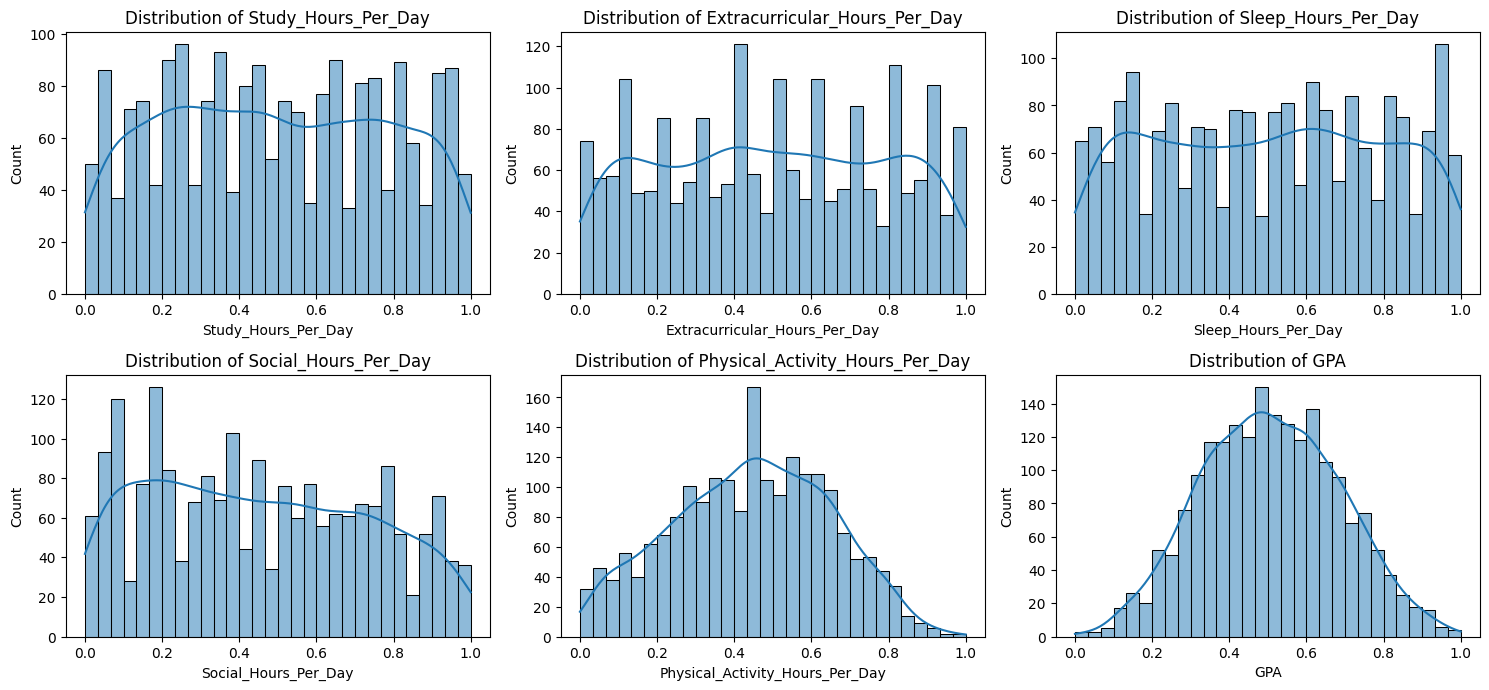

In [ ]:
# Filter hanya kolom numerik
numeric_columns = final_data.select_dtypes(include=np.number).columns

# Atur ukuran grid (3x3)
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten untuk iterasi mudah

# Plot setiap kolom
for i, column in enumerate(numeric_columns):
    sns.histplot(final_data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Jika kolom lebih sedikit dari grid, kosongkan sisa subplot
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])  # Hapus axis yang tidak digunakan

# Atur tata letak
plt.tight_layout()
plt.show()

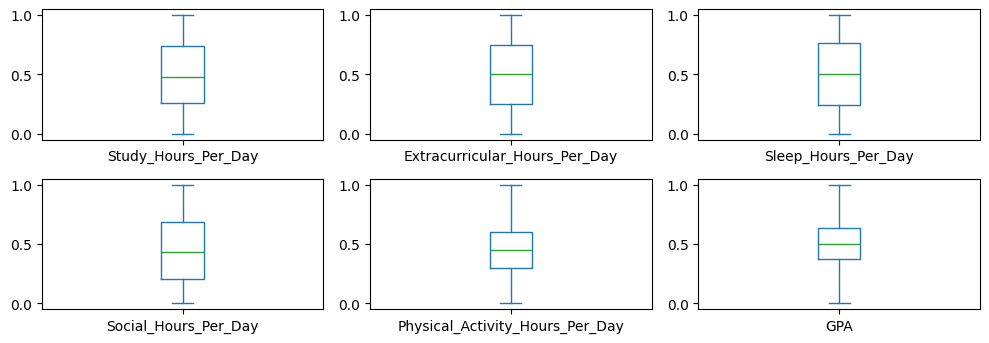

In [ ]:
final_data.plot(kind='box', subplots=True, layout=(3,3), figsize=(10, 5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

### **6. Dimensionality Reduction**

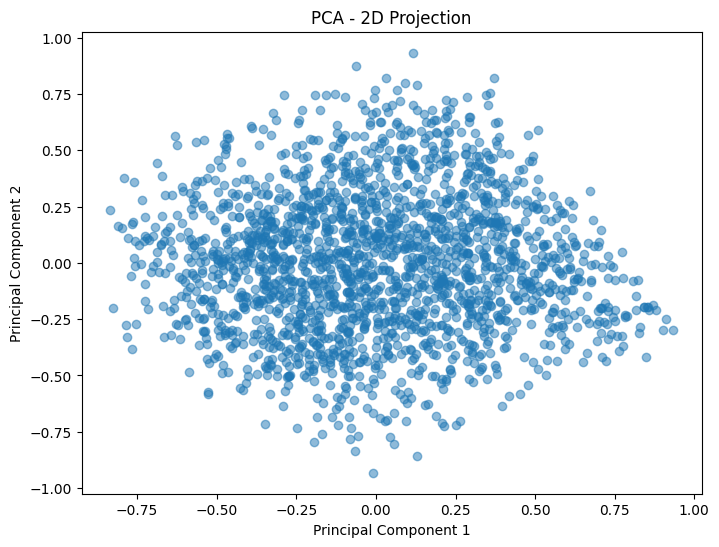

In [ ]:
# PCA untuk mengurangi dimensi ke 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(final_data)
pca_data = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Visualisasi hasil PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA - 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### **7. Cluster Tendency Test**

In [ ]:
def hopkins(X): # Where X is the dataset
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

hopkins_stat = hopkins(pca_data)
print(f"Hopkins Statistic: {hopkins_stat}")

Hopkins Statistic: 0.8652222368391803


### **8. Applying Clustering Algorithm (K-Means)**

Elbow Method

Text(0.5, 1.0, 'Elbow Method')

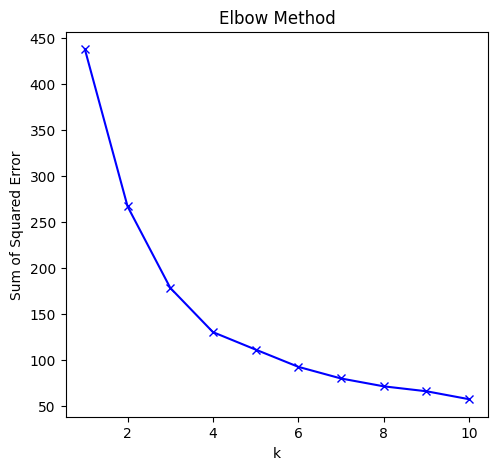

In [ ]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method')

Silhouette Score

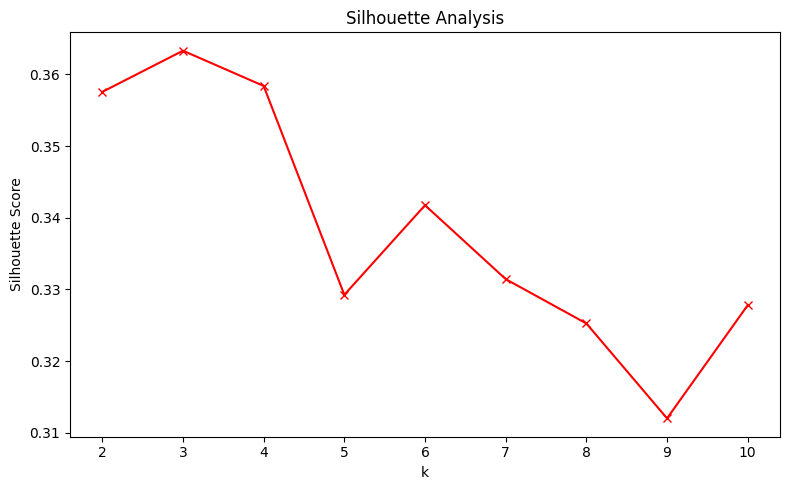

In [ ]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

### **9. Final Cluster Visualization**

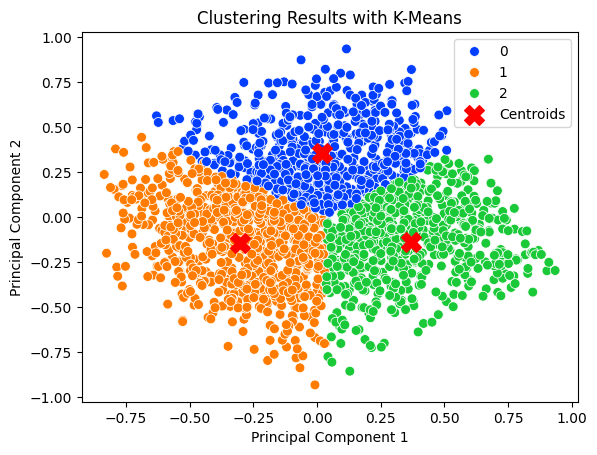

           PC1       PC2  Cluster
0     0.219669 -0.326423        2
1    -0.206392 -0.289970        1
2    -0.082664 -0.781924        1
3    -0.238467 -0.226838        1
4    -0.095763  0.275650        0
...        ...       ...      ...
1991 -0.316523  0.036662        1
1992 -0.054481 -0.504414        1
1993 -0.545463 -0.031949        1
1994 -0.043575  0.235014        0
1995  0.276736  0.306824        0

[1996 rows x 3 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_data[['PC1', 'PC2']])  # Ensure you're using the PCA components

# Add cluster labels to the DataFrame
pca_data['Cluster'] = kmeans.labels_

# Plot the clustering results
palette = sns.color_palette('bright', 3)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette=palette, data=pca_data, s=50)

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add plot labels and title
plt.title('Clustering Results with K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Show the plot
plt.show()

# Display the DataFrame with cluster labels
print(pca_data)


In [ ]:
cluster_counts = pca_data['Cluster'].value_counts()
print("Data points per cluster:")
print(cluster_counts)

Data points per cluster:
Cluster
1    796
2    629
0    571
Name: count, dtype: int64


In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2'])
centroids['Cluster'] = range(len(centroids))
print("\nCluster centroids (in PCA space):")
print(centroids)


Cluster centroids (in PCA space):
        PC1       PC2  Cluster
0  0.020408  0.353374        0
1 -0.303893 -0.147059        1
2  0.367708 -0.137024        2



Cluster 0:
Number of data points: 571
              PC1         PC2  Cluster
count  571.000000  571.000000    571.0
mean     0.022616    0.353813      0.0
std      0.224507    0.180855      0.0
min     -0.630411    0.025622      0.0
25%     -0.127172    0.209572      0.0
50%      0.027331    0.329444      0.0
75%      0.186017    0.479019      0.0
max      0.509949    0.932867      0.0

Cluster 1:
Number of data points: 796
              PC1         PC2  Cluster
count  796.000000  796.000000    796.0
mean    -0.305543   -0.144139      1.0
std      0.201861    0.233157      0.0
min     -0.835777   -0.932075      1.0
25%     -0.450180   -0.308758      1.0
50%     -0.290661   -0.126651      1.0
75%     -0.137409    0.028993      1.0
max      0.033942    0.442630      1.0

Cluster 2:
Number of data points: 629
              PC1         PC2  Cluster
count  629.000000  629.000000    629.0
mean     0.366134   -0.138779      2.0
std      0.207794    0.211842      0.0
min      0.035293   -0.85

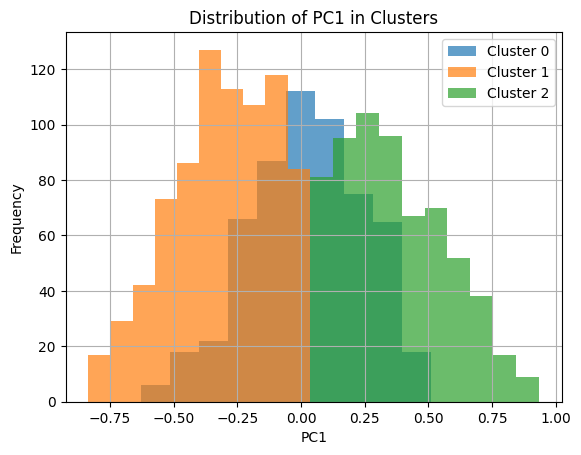

In [ ]:
for cluster in sorted(pca_data['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = pca_data[pca_data['Cluster'] == cluster]
    print(f"Number of data points: {len(cluster_data)}")
    print(cluster_data.describe())

    cluster_data['PC1'].hist(alpha=0.7, label=f'Cluster {cluster}')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('Frequency')
plt.title('Distribution of PC1 in Clusters')
plt.show()


Cluster 0:
Number of data points: 571
              PC1         PC2  Cluster
count  571.000000  571.000000    571.0
mean     0.022616    0.353813      0.0
std      0.224507    0.180855      0.0
min     -0.630411    0.025622      0.0
25%     -0.127172    0.209572      0.0
50%      0.027331    0.329444      0.0
75%      0.186017    0.479019      0.0
max      0.509949    0.932867      0.0

Cluster 1:
Number of data points: 796
              PC1         PC2  Cluster
count  796.000000  796.000000    796.0
mean    -0.305543   -0.144139      1.0
std      0.201861    0.233157      0.0
min     -0.835777   -0.932075      1.0
25%     -0.450180   -0.308758      1.0
50%     -0.290661   -0.126651      1.0
75%     -0.137409    0.028993      1.0
max      0.033942    0.442630      1.0

Cluster 2:
Number of data points: 629
              PC1         PC2  Cluster
count  629.000000  629.000000    629.0
mean     0.366134   -0.138779      2.0
std      0.207794    0.211842      0.0
min      0.035293   -0.85

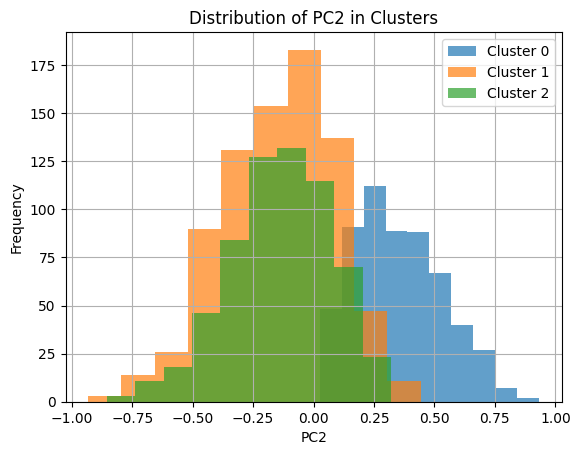

In [ ]:
for cluster in sorted(pca_data['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = pca_data[pca_data['Cluster'] == cluster]
    print(f"Number of data points: {len(cluster_data)}")
    print(cluster_data.describe())

    cluster_data['PC2'].hist(alpha=0.7, label=f'Cluster {cluster}')
plt.legend()
plt.xlabel('PC2')
plt.ylabel('Frequency')
plt.title('Distribution of PC2 in Clusters')
plt.show()

In [ ]:
distances = cdist(kmeans.cluster_centers_, kmeans.cluster_centers_)
print("\nInter-cluster distances:")
print(pd.DataFrame(distances, columns=[f'Cluster {i}' for i in range(len(kmeans.cluster_centers_))],
                   index=[f'Cluster {i}' for i in range(len(kmeans.cluster_centers_))]))


Inter-cluster distances:
           Cluster 0  Cluster 1  Cluster 2
Cluster 0   0.000000   0.596325   0.600922
Cluster 1   0.596325   0.000000   0.671676
Cluster 2   0.600922   0.671676   0.000000


### **10. Evaluasi Model**

In [ ]:
combined_data = pd.concat([data, pca_data[['Cluster']]], axis=1)
distribution = combined_data.groupby(['Cluster', 'Stress_Level']).size().unstack(fill_value=0)
print(distribution)

Stress_Level  High  Low  Moderate
Cluster                          
0.0            298   73       200
1.0            383  140       273
2.0            346   84       199


In [ ]:
pca_data.groupby(['PC1',  'PC2']).size().reset_index().rename(columns={0:'count'})

,PC1,PC2,count
0,-0.835777,0.236186,1
1,-0.826462,-0.200795,1
2,-0.810964,0.163743,1
3,-0.796940,0.153436,1
4,-0.791256,0.377933,1
...,...,...,...
1991,0.869075,-0.185708,1
1992,0.880502,-0.207889,1
1993,0.902555,-0.298354,1
1994,0.910029,-0.251415,1


In [ ]:
pca_data['Cluster'].unique()

array([2, 1, 0], dtype=int32)

In [ ]:
with open('kmeans_pipeline.pkl', 'wb') as f:
    pickle.dump({
        'scaler': scaler,
        'pca': pca,
        'kmeans': kmeans
    }, f)
print("Model dan preprocessing telah disimpan.")

Model dan preprocessing telah disimpan.


In [ ]:
# Muat kembali model dan preprocessing
with open('kmeans_pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)

scaler = pipeline['scaler']
pca = pipeline['pca']
kmeans = pipeline['kmeans']

# Contoh data baru
data_baru = pd.DataFrame([{
    'Study_Hours_Per_Day': 6.5,
    'Extracurricular_Hours_Per_Day': 2.1,
    'Sleep_Hours_Per_Day': 7.2,
    'Social_Hours_Per_Day': 1.7,
    'Physical_Activity_Hours_Per_Day': 6.5,
    'GPA': 2.88
}])

# Normalisasi data baru
data_baru_scaled = scaler.transform(data_baru)

# Reduksi dimensi dengan PCA
data_baru_pca = pca.transform(data_baru_scaled)

# Prediksi cluster
cluster_pred = kmeans.predict(data_baru_pca)
print(f"Data baru termasuk ke dalam cluster: {cluster_pred[0]}")


Data baru termasuk ke dalam cluster: 1


Jarak data baru ke setiap centroid: [0.80680976 0.21484458 0.84221847]


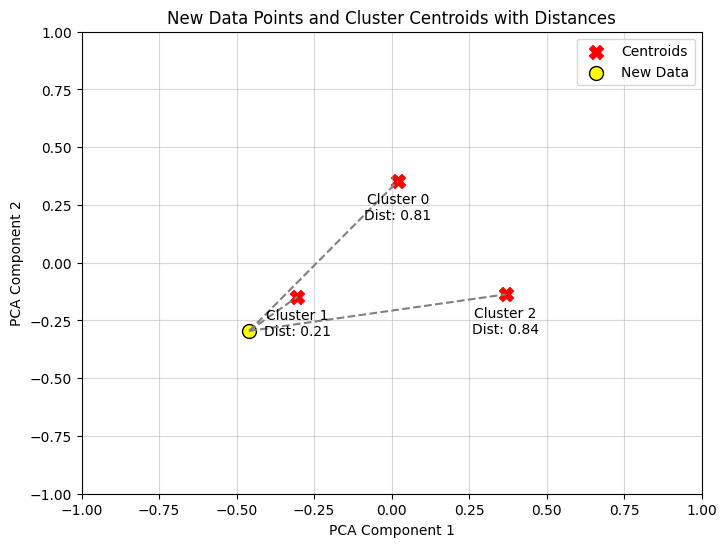

In [ ]:
# Hitung jarak data baru ke setiap centroid
distances = np.linalg.norm(kmeans.cluster_centers_ - data_baru_pca, axis=1)

# Tampilkan hasil jarak
print(f"Jarak data baru ke setiap centroid: {distances}")

# Visualisasi data baru dengan centroid
plt.figure(figsize=(8, 6))

# Plot centroid cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', label='Centroids', s=100, marker='X')

# Tambahkan label untuk setiap centroid di bawah titik (termasuk jarak)
for i, (x, y) in enumerate(kmeans.cluster_centers_):
    plt.text(x, y - 0.05, f'Cluster {i}\nDist: {distances[i]:.2f}',
             color='black', fontsize=10, ha='center', va='top')

# Plot data baru
plt.scatter(data_baru_pca[:, 0], data_baru_pca[:, 1],
            color='yellow', label='New Data', s=100, edgecolor='black')

# Hubungkan data baru ke setiap centroid dengan garis
for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.plot([data_baru_pca[0, 0], centroid[0]],
             [data_baru_pca[0, 1], centroid[1]],
             linestyle='--', color='gray')

# Atur rentang sumbu dan jarak ticks
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.25, 0.25))
plt.yticks(np.arange(-1, 1.25, 0.25))

# Label dan judul
plt.title("New Data Points and Cluster Centroids with Distances")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(alpha=0.5)
plt.show()
